In [319]:
# Dependencies
import matplotlib
import pandas as pd
import numpy as np
import datetime as dt
import statistics

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [320]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [321]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [322]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = []
june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)


In [323]:
#  3. Convert the June temperatures to a list.
june.all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [324]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df=pd.DataFrame(june,columns=['date','June Temps'])

In [325]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [326]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December
december = []
december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [327]:
# 7. Convert the December temperatures to a list.
december.all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [328]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df=pd.DataFrame(december,columns=['date','December Temps'])

In [329]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Summarising the Analysis for June & December temps

In [330]:
june_stats = june_df.describe()
dec_stats = dec_df.describe()

summary_temp_df = june_stats.merge(dec_stats, left_index=True, right_index=True)
summary_temp_df

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


<AxesSubplot:>

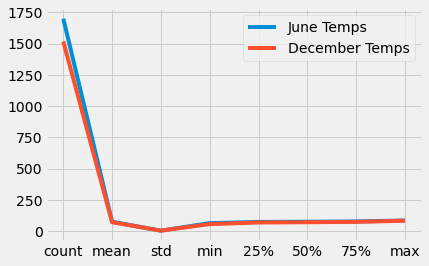

In [331]:
summary_temp_df.plot()

<AxesSubplot:>

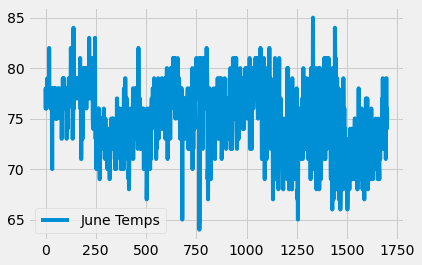

In [332]:
june_df.plot()

<AxesSubplot:>

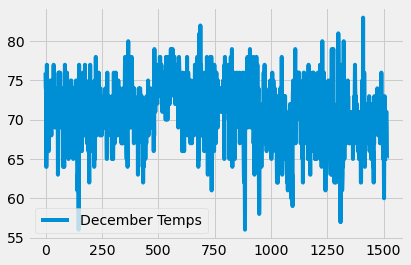

In [333]:
dec_df.plot()

## Precipitation Analysis for June & December

In [334]:
june_prcp = []
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6)
june_prcp.all()

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [335]:
june_prcp_df=pd.DataFrame(june_prcp,columns=['date','June Precip.'])
june_prcp_df.describe()

,June Precip.
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [336]:
dec_prcp = []
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12)
dec_prcp.all()

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [337]:
dec_prcp_df=pd.DataFrame(dec_prcp,columns=['date','December Precip.'])
dec_prcp_df.describe()

,December Precip.
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [338]:
june_prcp_stats = june_prcp_df.describe()
dec_prcp_stats = dec_prcp_df.describe()

summary_prcp_df = june_prcp_stats.merge(dec_prcp_stats, left_index=True, right_index=True)
summary_prcp_df

,June Precip.,December Precip.
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


<AxesSubplot:>

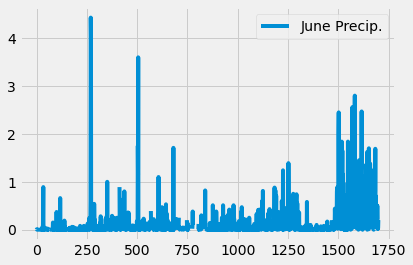

In [339]:
june_prcp_df.plot()

<AxesSubplot:>

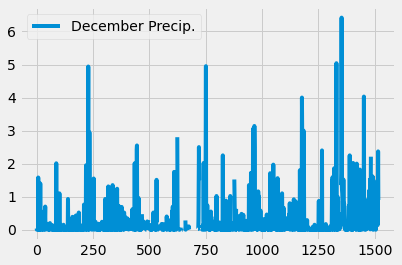

In [340]:
dec_prcp_df.plot()

## Temperatures by Station for June

In [341]:
# Gathering data relating to June temps by station
june_temp_stn = []
june_temp_stn = session.query(Measurement.station, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6)
june_temp_stn.all()

[('USC00519397', 78.0, 0.0),
 ('USC00519397', 76.0, 0.01),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 76.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 79.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 82.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 76.0, 0.02),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 77.0, 0.07),
 ('USC00519397', 78.0, 0.0),
 ('USC00519397', 73.0, 0.56),
 ('USC00519397', 70.0, 0.89),
 ('USC005

In [342]:
# Converting list into dataframe and calculating av temps by station
stn_temp_june_df=pd.DataFrame(june_temp_stn,columns=['station','June temps', 'June rain'])
df=stn_temp_june_df.groupby('station')['June temps'].agg('mean') # grouping average temps by station
df

station
USC00511918    74.139394
USC00513117    74.050847
USC00514830    76.005376
USC00516128    71.937220
USC00517948    76.655405
USC00518838    73.394737
USC00519281    73.271186
USC00519397    77.559322
USC00519523    76.668103
Name: June temps, dtype: float64

In [343]:
# Converting list into dataframe and calculating av rainfall by station
stn_temp_june_df=pd.DataFrame(june_temp_stn,columns=['station','June temps', 'June rain'])
df1=stn_temp_june_df.groupby('station')['June rain'].agg('mean') # grouping average precipitation by station
df1

station
USC00511918    0.015157
USC00513117    0.118248
USC00514830    0.114192
USC00516128    0.495748
USC00517948    0.057975
USC00518838    0.094615
USC00519281    0.151525
USC00519397    0.022661
USC00519523    0.050044
Name: June rain, dtype: float64

In [344]:
# Converting list into dataframe and calculating av rainfall by station
stn_temp_june_df=pd.DataFrame(june_temp_stn,columns=['station','June temps', 'June rain'])
df2=stn_temp_june_df.groupby('station')['June temps','June rain'].agg('mean') # grouping average precipitation by station
df2

c:\Users\thela\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,June temps,June rain
station,,
USC00511918,74.139394,0.015157
USC00513117,74.050847,0.118248
USC00514830,76.005376,0.114192
USC00516128,71.937220,0.495748
USC00517948,76.655405,0.057975
USC00518838,73.394737,0.094615
USC00519281,73.271186,0.151525
USC00519397,77.559322,0.022661
USC00519523,76.668103,0.050044


## Temperatures by Station for December

In [345]:
# Gathering data relating to December temps by station
dec_temp_stn = []
dec_temp_stn = session.query(Measurement.station, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12)
dec_temp_stn.all()

[('USC00519397', 76.0, 0.04),
 ('USC00519397', 74.0, 0.0),
 ('USC00519397', 74.0, 0.0),
 ('USC00519397', 64.0, 0.0),
 ('USC00519397', 64.0, 0.0),
 ('USC00519397', 67.0, 0.0),
 ('USC00519397', 77.0, 0.0),
 ('USC00519397', 66.0, 1.58),
 ('USC00519397', 69.0, 0.77),
 ('USC00519397', 68.0, 0.0),
 ('USC00519397', 68.0, 0.0),
 ('USC00519397', 71.0, 0.0),
 ('USC00519397', 74.0, 0.0),
 ('USC00519397', 67.0, 0.0),
 ('USC00519397', 66.0, 0.0),
 ('USC00519397', 69.0, 0.0),
 ('USC00519397', 71.0, 1.4),
 ('USC00519397', 70.0, 0.0),
 ('USC00519397', 70.0, 0.0),
 ('USC00519397', 74.0, None),
 ('USC00519397', 74.0, 0.13),
 ('USC00519397', 71.0, 0.55),
 ('USC00519397', 75.0, 0.06),
 ('USC00519397', 75.0, 0.01),
 ('USC00519397', 72.0, 0.0),
 ('USC00519397', 69.0, 0.03),
 ('USC00519397', 68.0, 0.08),
 ('USC00519397', 73.0, 0.0),
 ('USC00519397', 74.0, 0.0),
 ('USC00519397', 73.0, 0.0),
 ('USC00519397', 73.0, 0.0),
 ('USC00519397', 73.0, 0.0),
 ('USC00519397', 73.0, 0.0),
 ('USC00519397', 71.0, 0.13),
 ('

In [346]:
# Converting list into dataframe
stn_temp_dec_df=pd.DataFrame(dec_temp_stn,columns=['station','Dec temps', 'Dec rain'])
df3=stn_temp_dec_df.groupby('station')['Dec temps'].agg('mean') # grouping average temps by station
df3

station
USC00511918    69.684211
USC00513117    71.069444
USC00514830    73.224719
USC00516128    69.291262
USC00517948    71.834862
USC00518838    72.421053
USC00519281    69.903226
USC00519397    71.109524
USC00519523    72.433333
Name: Dec temps, dtype: float64

In [347]:
# Converting list into dataframe and calculating av rainfall by station
stn_temp_dec_df=pd.DataFrame(dec_temp_stn,columns=['station','Dec temps', 'Dec rain'])
df4=stn_temp_dec_df.groupby('station')['Dec rain'].agg('mean') # grouping average precipitation by station
df4

station
USC00511918    0.138146
USC00513117    0.203241
USC00514830    0.154966
USC00516128    0.507005
USC00517948    0.152727
USC00518838    0.638182
USC00519281    0.244931
USC00519397    0.075314
USC00519523    0.162010
Name: Dec rain, dtype: float64

In [348]:
# Converting list into dataframe and calculating av rainfall by station
stn_temp_dec_df=pd.DataFrame(dec_temp_stn,columns=['station','Dec temps', 'Dec rain'])
df5=stn_temp_dec_df.groupby('station')['Dec temps','Dec rain'].agg('mean') # grouping average precipitation by station
df5

c:\Users\thela\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Dec temps,Dec rain
station,,
USC00511918,69.684211,0.138146
USC00513117,71.069444,0.203241
USC00514830,73.224719,0.154966
USC00516128,69.291262,0.507005
USC00517948,71.834862,0.152727
USC00518838,72.421053,0.638182
USC00519281,69.903226,0.244931
USC00519397,71.109524,0.075314
USC00519523,72.433333,0.162010
